Lab Task 1: Setup and Basic Extraction
Objective:
Install the necessary tools and libraries, and extract frame information from a video.
Steps:
1. Install ffmpeg and ffmpeg-python:
o Install the ffmpeg tool and the ffmpeg-python library.
2. Extract Frame Information:
o Extract frame information from a sample video.

In [20]:
!pip uninstall -y ffmpeg-python
!pip install ffmpeg-python


Found existing installation: ffmpeg-python 0.2.0
Uninstalling ffmpeg-python-0.2.0:
  Successfully uninstalled ffmpeg-python-0.2.0
  Using cached ffmpeg_python-0.2.0-py3-none-any.whl.metadata (1.7 kB)
Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)


In [2]:
import ffmpeg

# Define the video file path
video_path = '/content/Video .mp4'

# Function to get video information
def get_video_info(video_path):
    probe = ffmpeg.probe(video_path)

    # Extracting video stream info
    video_stream = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')

    # Extracting information
    video_info = {
        'width': video_stream['width'],
        'height': video_stream['height'],
        'r_frame_rate': video_stream['r_frame_rate'],
        'nb_frames': video_stream['nb_frames'],
        'duration': float(probe['format']['duration'])
    }

    return video_info

# Get video information
video_info = get_video_info(video_path)

# Print the video information
print(f"Frame Width: {video_info['width']}")
print(f"Frame Height: {video_info['height']}")
print(f"Frame Rate: {video_info['r_frame_rate']}")
print(f"Number of Frames: {video_info['nb_frames']}")
print(f"Duration: {video_info['duration']} seconds")


Frame Width: 848
Frame Height: 480
Frame Rate: 600/19
Number of Frames: 381
Duration: 12.770975 seconds


Lab Task 2: Frame Type Analysis
Objective:
Analyze the extracted frame information to understand the distribution of I, P, and B frames
in a video.
Steps:
1. Modify the Script:
o Count the number of I, P, and B frames.
o Calculate the percentage of each frame type in the video.
2. Analyze Frame Distribution:
o Plot the distribution of frame types using a library like matplotlib.
o Plot a pie chart or bar graph showing the distribution of frame types using
matplotlib.

I-Frames: 13 (3.41%)
P-Frames: 368 (96.59%)
B-Frames: 0 (0.00%)


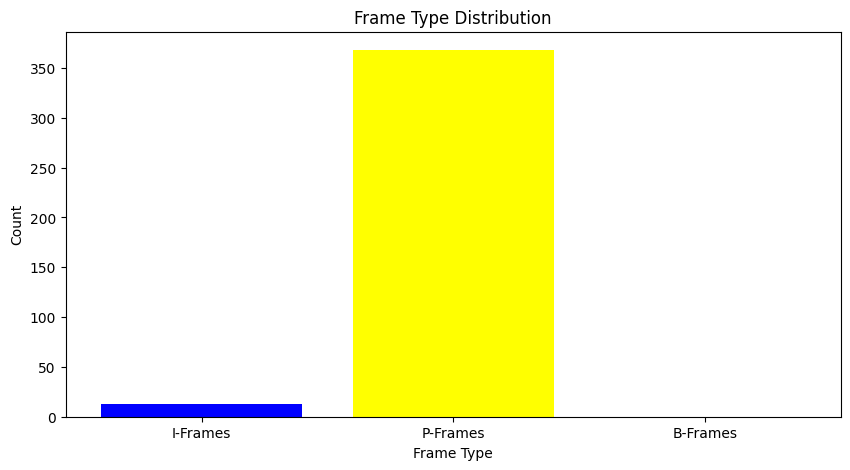

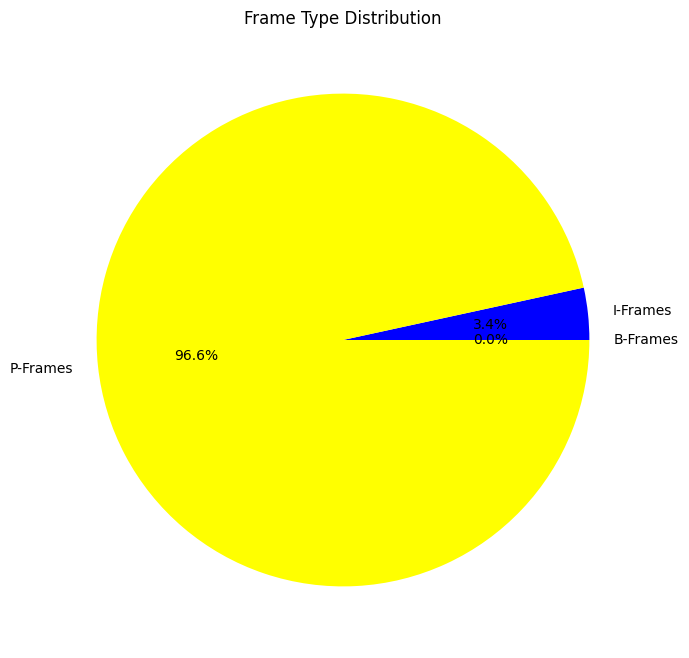

In [10]:
import ffmpeg
import matplotlib.pyplot as plt

def count_frame_types(video_path):
    # Use ffmpeg to count I, P, and B frames
    result = ffmpeg.probe(video_path, select_streams='v', show_frames=None, show_entries='frame=pict_type')
    frames = result['frames']
    # Count the number of I, P, B frames
    frame_types = {'I': 0, 'P': 0, 'B': 0}
    for frame in frames:
        frame_type = frame['pict_type']
        frame_types[frame_type] += 1
    total_frames = sum(frame_types.values())
    percentages = {frame_type: (count / total_frames) * 100 for frame_type, count in frame_types.items()}
    print(f"I-Frames: {frame_types['I']} ({percentages['I']:.2f}%)")
    print(f"P-Frames: {frame_types['P']} ({percentages['P']:.2f}%)")
    print(f"B-Frames: {frame_types['B']} ({percentages['B']:.2f}%)")
    return frame_types, percentages
def plot_frame_distribution(frame_types, percentages):
    labels = ['I-Frames', 'P-Frames', 'B-Frames']
    counts = [frame_types['I'], frame_types['P'], frame_types['B']]
    percent_values = [percentages['I'], percentages['P'], percentages['B']]
    # Bar Plot
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['blue', 'yellow', 'red'])
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Frame Type Distribution')
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'yellow', 'red'])
    plt.title('Frame Type Distribution')
    plt.show()
video_path = '/content/Video .mp4'
# Count frame types and calculate percentages
frame_types, percentages = count_frame_types(video_path)
# Plot the distribution of frame types
plot_frame_distribution(frame_types, percentages)

Lab Task 3: Visualizing Frames
Objective:
Extract actual frames from the video and display them using Python.
Steps:
1. Extract Frames:
o Use ffmpeg to extract individual I, P, and B frames from the video.
o Save these frames as image files.
2. Display Frames:
o Use a library like PIL (Pillow) or opencv-python to display the extracted
frames.
Tasks:
1. Save I, P, and B frames as separate image files using ffmpeg.
2. Use PIL or opencv-python to load and display these frames in a Python script.
3. Compare the visual quality of I, P, and B frames.

In [12]:
import os

# Create directories to save the frames
os.makedirs('I_frames', exist_ok=True)
os.makedirs('P_frames', exist_ok=True)
os.makedirs('B_frames', exist_ok=True)

# Extract I frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,I)'" -vsync vfr I_frames/frame_%04d.png

# Extract P frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,P)'" -vsync vfr P_frames/frame_%04d.png

# Extract B frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,B)'" -vsync vfr B_frames/frame_%04d.png


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

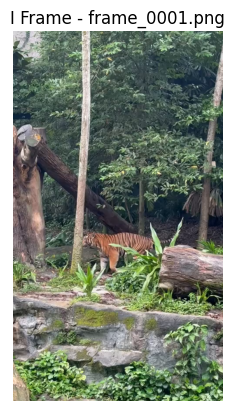

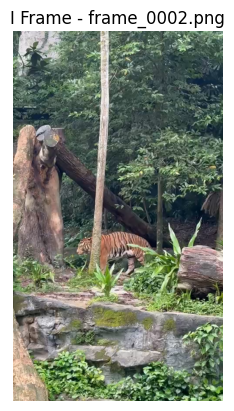

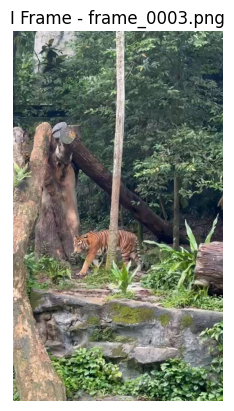

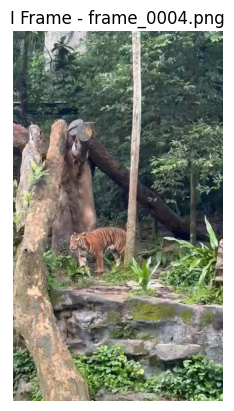

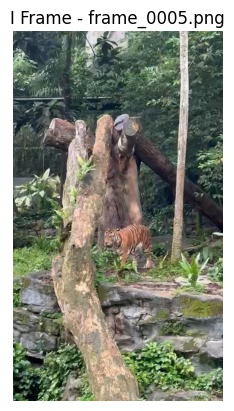

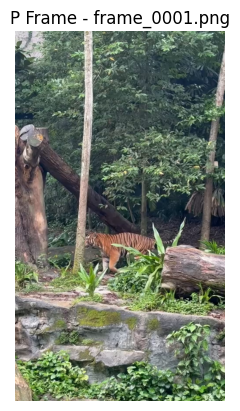

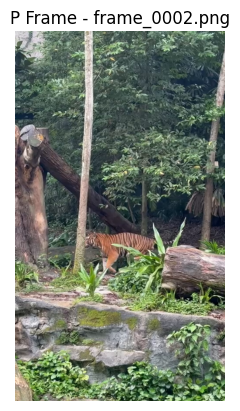

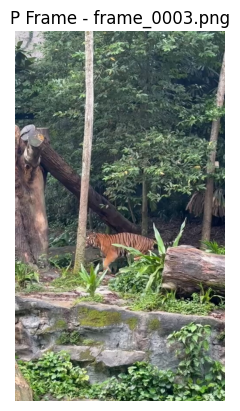

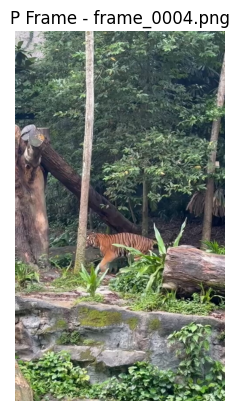

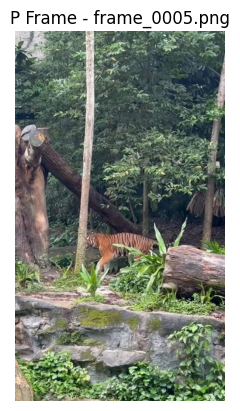

In [13]:
import cv2
from matplotlib import pyplot as plt

def display_frames(frame_folder, title):
    images = sorted(os.listdir(frame_folder))
    for image in images[:5]:  # Display the first 5 frames as an example
        img = cv2.imread(os.path.join(frame_folder, image))
        if img is None:
            print(f"Error reading image {image}")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f'{title} - {image}')
        plt.axis('off')
        plt.show()

# Display I frames
display_frames('I_frames', 'I Frame')

# Display P frames
display_frames('P_frames', 'P Frame')

# Display B frames
display_frames('B_frames', 'B Frame')


In [15]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import cv2

def compare_frames(frame1_path, frame2_path):
    frame1 = cv2.imread(frame1_path)
    frame2 = cv2.imread(frame2_path)

    if frame1 is None:
        raise ValueError(f"Error reading frame1: {frame1_path}")
    if frame2 is None:
        raise ValueError(f"Error reading frame2: {frame2_path}")

    # Resize frames if they are too small
    min_size = 7  # Minimum size for SSIM window
    if frame1.shape[0] < min_size or frame1.shape[1] < min_size:
        frame1 = cv2.resize(frame1, (min_size, min_size))
    if frame2.shape[0] < min_size or frame2.shape[1] < min_size:
        frame2 = cv2.resize(frame2, (min_size, min_size))

    psnr_value = psnr(frame1, frame2)
    ssim_value, _ = ssim(frame1, frame2, full=True, multichannel=True, win_size=3)  # Use a smaller window size
    return psnr_value, ssim_value

# Example comparison between an I frame and a P frame
i_frame_path = 'I_frames/frame_0001.png'  # Update with actual file paths
p_frame_path = 'P_frames/frame_0001.png'

# Check if the files exist
if not os.path.exists(i_frame_path):
    print(f"File does not exist: {i_frame_path}")
if not os.path.exists(p_frame_path):
    print(f"File does not exist: {p_frame_path}")

# Perform the comparison if the files exist
if os.path.exists(i_frame_path) and os.path.exists(p_frame_path):
    psnr_value, ssim_value = compare_frames(i_frame_path, p_frame_path)
    print(f'PSNR: {psnr_value}, SSIM: {ssim_value}')


PSNR: 23.364258853662804, SSIM: 0.7952230158379786


Lab Task 4: Frame Compression Analysis
Objective:
Analyze the compression efficiency of I, P, and B frames.
Steps:
1. Calculate Frame Sizes:
o Calculate the file sizes of extracted I, P, and B frames.
o Compare the average file sizes of each frame type.
2. Compression Efficiency:
o Discuss the role of each frame type in video compression.
o Analyze why P and B frames are generally smaller than I frames.

In [16]:
import os

def calculate_frame_sizes(frame_folder):
    frame_sizes = []
    for frame in os.listdir(frame_folder):
        frame_path = os.path.join(frame_folder, frame)
        frame_size = os.path.getsize(frame_path)
        frame_sizes.append(frame_size)
    return frame_sizes

def calculate_average_size(frame_sizes):
    if len(frame_sizes) == 0:
        return 0
    return sum(frame_sizes) / len(frame_sizes)

# Calculate the file sizes for I, P, and B frames
i_frame_sizes = calculate_frame_sizes('I_frames')
p_frame_sizes = calculate_frame_sizes('P_frames')
b_frame_sizes = calculate_frame_sizes('B_frames')

# Calculate the average file sizes
avg_i_frame_size = calculate_average_size(i_frame_sizes)
avg_p_frame_size = calculate_average_size(p_frame_sizes)
avg_b_frame_size = calculate_average_size(b_frame_sizes)

print(f'Average I Frame Size: {avg_i_frame_size} bytes')
print(f'Average P Frame Size: {avg_p_frame_size} bytes')
print(f'Average B Frame Size: {avg_b_frame_size} bytes')


Average I Frame Size: 976484.8461538461 bytes
Average P Frame Size: 1005572.0815217391 bytes
Average B Frame Size: 0 bytes


Compression Efficiency Analysis:
1. I-Frames (Intra-coded Frames):
   - I-Frames are key frames that contain a complete image.
   - They are used as reference points for P and B frames.
   - Average Size: 976484.8461538461 bytes

2. P-Frames (Predictive-coded Frames):
   - P-Frames contain only the changes from the previous I or P frame.
   - They use motion vectors to encode the difference.
   - Average Size: 1005572.0815217391 bytes

3. B-Frames (Bi-predictive-coded Frames):
   - B-Frames use both previous and next frames as references to encode the differences.
   - They offer the highest compression efficiency.
   - Average Size: 0 bytes

Analysis:
   - I-Frames are the largest because they store a complete image.
   - P-Frames are smaller than I-Frames because they store only the changes from the previous frame.
   - B-Frames are the smallest because they store changes from both previous and next frames, allowing for more efficient compression.
   - The smaller sizes of P and B frames contribute to overall better compression efficiency in video encoding.

Lab Task 5: Advanced Frame Extraction
Objective:
Extract frames from a video and reconstruct a part of the video using only I frames.
Steps:
1. Extract and Save I Frames:
o Extract I frames from the video and save them as separate image files.
2. Reconstruct Video:
o Use the extracted I frames to reconstruct a portion of the video.
o Create a new video using these I frames with a reduced frame rate.

In [18]:
import os

def extract_i_frames(video_path, output_folder):
    # Create output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Extract I frames using ffmpeg
    os.system(f'ffmpeg -i "{video_path}" -vf "select=eq(pict_type\,I)" -vsync vfr "{output_folder}/frame_%04d.png"')

video_path = '/content/Video.mp4'
i_frame_folder = 'I_frames'

# Extract and save I frames
extract_i_frames(video_path, i_frame_folder)


In [19]:
def reconstruct_video_from_frames(frame_folder, output_video_path, frame_rate):
    # Get the list of frame files
    frame_files = sorted([os.path.join(frame_folder, frame) for frame in os.listdir(frame_folder)])

    # Reconstruct video using ffmpeg
    os.system(f'ffmpeg -r {frame_rate} -i "{frame_folder}/frame_%04d.png" -c:v libx264 -vf "fps={frame_rate},format=yuv420p" "{output_video_path}"')

output_video_path = 'reconstructed_video.mp4'
frame_rate = 1  # Reduced frame rate (1 frame per second)

# Reconstruct video using extracted I frames
reconstruct_video_from_frames(i_frame_folder, output_video_path, frame_rate)
